# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [123]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/feiyiyang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [124]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [125]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [126]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q="bitcoin", language="en",sort_by="relevancy")
btc_news['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [127]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(q="ethereum", language="en",sort_by="relevancy")

In [128]:
# Create the function to generate sentiment scores DataFrame
def sentiments_df(news):### news dictionary from news API get_everything function
    sentiments=[]
    for article in news['articles']:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })       
        except AttributeError:
            pass
    df = pd.DataFrame(sentiments)
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]
    return df

In [129]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_df=sentiments_df(btc_news)

In [130]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_df=sentiments_df(eth_news)
eth_df

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
2,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
3,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
4,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
5,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935
6,2022-04-18,Dogecoiners unite! Movie theater chain AMC has...,0.4003,0.078,0.000,0.922
7,2022-05-01,There's a new metaverse project from the creat...,-0.2732,0.000,0.063,0.937
8,2022-05-09,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.000,0.822
9,2022-04-16,"Early this week, the Ukrainian Computer Emerge...",-0.7650,0.000,0.233,0.767


In [131]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.004405,0.06560,0.063100,0.871300
std,0.400008,0.06937,0.059805,0.094377
min,-0.549900,0.00000,0.000000,0.557000
25%,-0.335475,0.00000,0.000000,0.844250
50%,-0.114750,0.04900,0.063000,0.894000
75%,0.254725,0.08500,0.077000,0.930250
max,0.750600,0.20200,0.241000,0.964000


In [132]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.047875,0.048850,0.05690,0.894350
std,0.452134,0.065153,0.06113,0.060248
min,-0.765000,0.000000,0.00000,0.767000
25%,-0.334100,0.000000,0.00000,0.855250
50%,-0.249750,0.000000,0.06300,0.922500
75%,0.303775,0.076500,0.07550,0.937000
max,0.735100,0.188000,0.23300,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [133]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [182]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = list(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw+=['said','say','week','char','ha']


In [183]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    text = re.sub(r'[^\w\s]','',text)
    
    # Create a tokenized list of the words
    words=word_tokenize(text)

    # Lemmatize words into root words
    # Convert the words to lowercase 
    # Remove the stop words
    list_word=[lemmatizer.lemmatize(word).lower() for word in words if word not in sw]
    
    return list_word

In [184]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df['tokens']=btc_df.apply(lambda row : tokenizer(row['text']), axis = 1)

In [185]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokens']=eth_df.apply(lambda row : tokenizer(row['text']), axis = 1)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [186]:
from collections import Counter
from nltk import ngrams

In [204]:
def process_text(doc):
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [205]:
# Generate the  N-grams function 
# YOUR CODE HERE!
def generate_Ngram(df,N):
    doc=' '.join(df['text'])
    doc_p=process_text(doc)
    return ngrams(doc_p, n=N)

In [206]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
generate_Ngram(btc_df,2)

In [207]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
generate_Ngram(eth_df,2)


In [208]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [209]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(generate_Ngram(btc_df,2),10)

[(('reuters', 'bitcoin'), 5),
 (('previous', 'closebitcoin'), 4),
 (('closebitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'bestknown'), 4),
 (('bestknown', 'cryptocurrency'), 4),
 (('may', 'reuters'), 4),
 (('world', 'largest'), 2),
 (('interest', 'rate'), 2),
 (('april', 'reuters'), 2)]

In [210]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(generate_Ngram(eth_df,2),10)

[(('reuters', 'bitcoin'), 4),
 (('previous', 'closebitcoin'), 4),
 (('closebitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'bestknown'), 4),
 (('bestknown', 'cryptocurrency'), 4),
 (('may', 'reuters'), 3),
 (('yacht', 'club'), 2),
 (('april', 'reuters'), 2),
 (('lite', 'hash'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [211]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

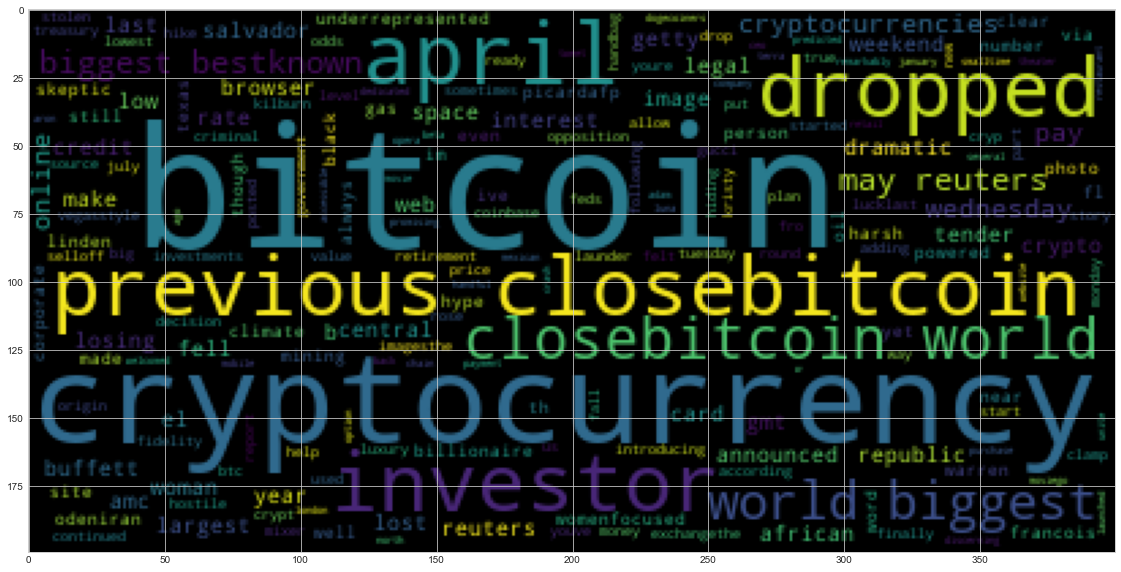

In [212]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def generate_wc(df):
    doc=' '.join(df['text'])
    doc_p=process_text(doc)
    input_text=' '.join(doc_p)
    wc = WordCloud().generate(input_text)
    plt.imshow(wc)

generate_wc(btc_df)

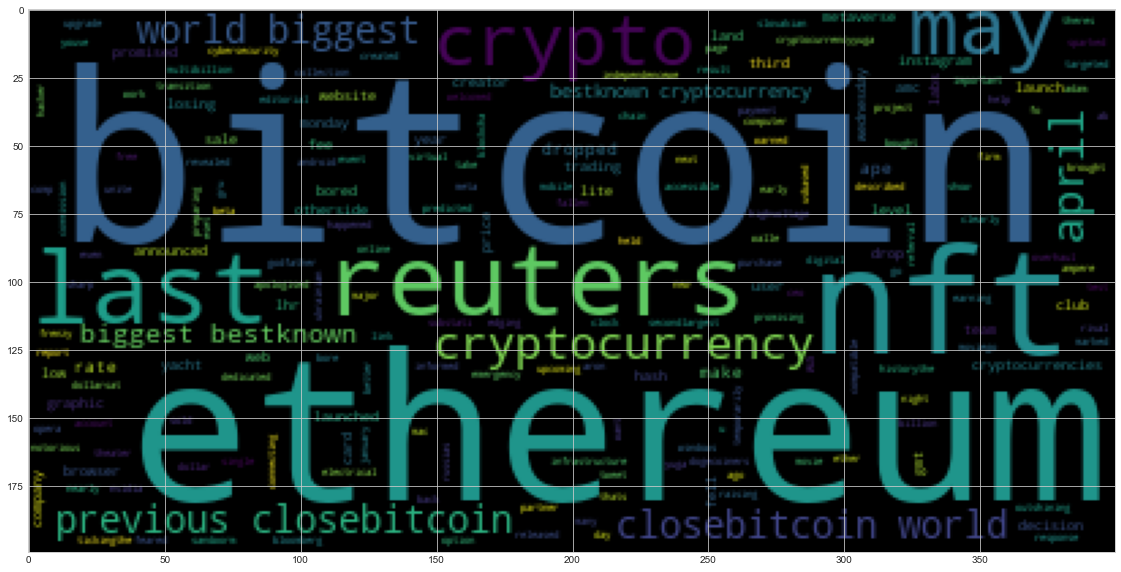

In [213]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
generate_wc(eth_df)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [214]:
import spacy
from spacy import displacy

In [215]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [216]:
# Concatenate all of the Bitcoin text together
doc=' '.join(btc_df['text'])
# Run the NER processor on all of the text
doc=nlp(doc)
# Render the visualization
displacy.render(doc, style='ent')


In [217]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Warren Buffett PERSON
the weekend DATE
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
+2164 NORP
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 PERSON
Opera ORG
Crypto Browser WORK_

---

### Ethereum NER

In [218]:
# Concatenate all of the Ethereum text together
doc=' '.join(btc_df['text'])
# Run the NER processor on all of the text
doc=nlp(doc)
# Render the visualization
displacy.render(doc, style='ent')


In [219]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Warren Buffett PERSON
the weekend DATE
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
+2164 NORP
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 PERSON
Opera ORG
Crypto Browser WORK_

---